# Concise Implementation of Linear Regression

We will show you how to implement
the linear regression model
concisely by using high-level APIs

In [1]:
import numpy as np
import torch
from d2l import torch as d2l

Call the existing API in a framework to read data

In [4]:
@d2l.add_to_class(d2l.SyntheticRegressionData)  
def train_dataloader(self):
    dataset = torch.utils.data.TensorDataset(self.X, self.y)
    return torch.utils.data.DataLoader(dataset, self.batch_size, shuffle=True)

data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2,
                                   batch_size=4)

next(iter(data.train_dataloader()))

[tensor([[ 0.5682,  1.1265],
         [ 1.6624,  1.3853],
         [ 0.2853, -0.5732],
         [-0.3385, -0.2766]]),
 tensor([[1.4938],
         [2.7988],
         [6.7223],
         [4.4539]])]

Use a framework's predefined layers

In [5]:
from torch import nn

class LinearRegression(d2l.Module):  
    def __init__(self, num_inputs, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Linear(num_inputs, num_outputs)

Initialize the model parameters

The `MSELoss` class computes the mean squared error

In [7]:
@d2l.add_to_class(LinearRegression)
def forward(self, X):
    """The linear regression model."""
    return self.net(X)

@d2l.add_to_class(LinearRegression)
def training_step(self, batch, batch_idx):
    X, y = batch
    loss = nn.MSELoss()
    l = loss(self(X), y)
    self.board.draw({'step': batch_idx, 'loss': l}, every_n=10)
    return l

Instantiate an `SGD` instance

In [8]:
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

The training loop itself is strikingly similar
to the one we obtained by implementing everything from scratch

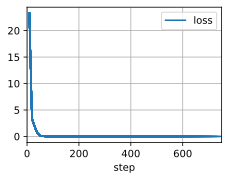

In [9]:
model = LinearRegression(2, 1, lr=0.03)
trainer = d2l.Trainer(3)
trainer.fit(model, data)

Compare the model parameters learned by training on finite data
and the actual parameters

In [11]:
w = model.net.weight.data
b = model.net.bias.data

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([0.0003, 0.0002])
error in estimating b: tensor([2.9564e-05])
